### The Workflow


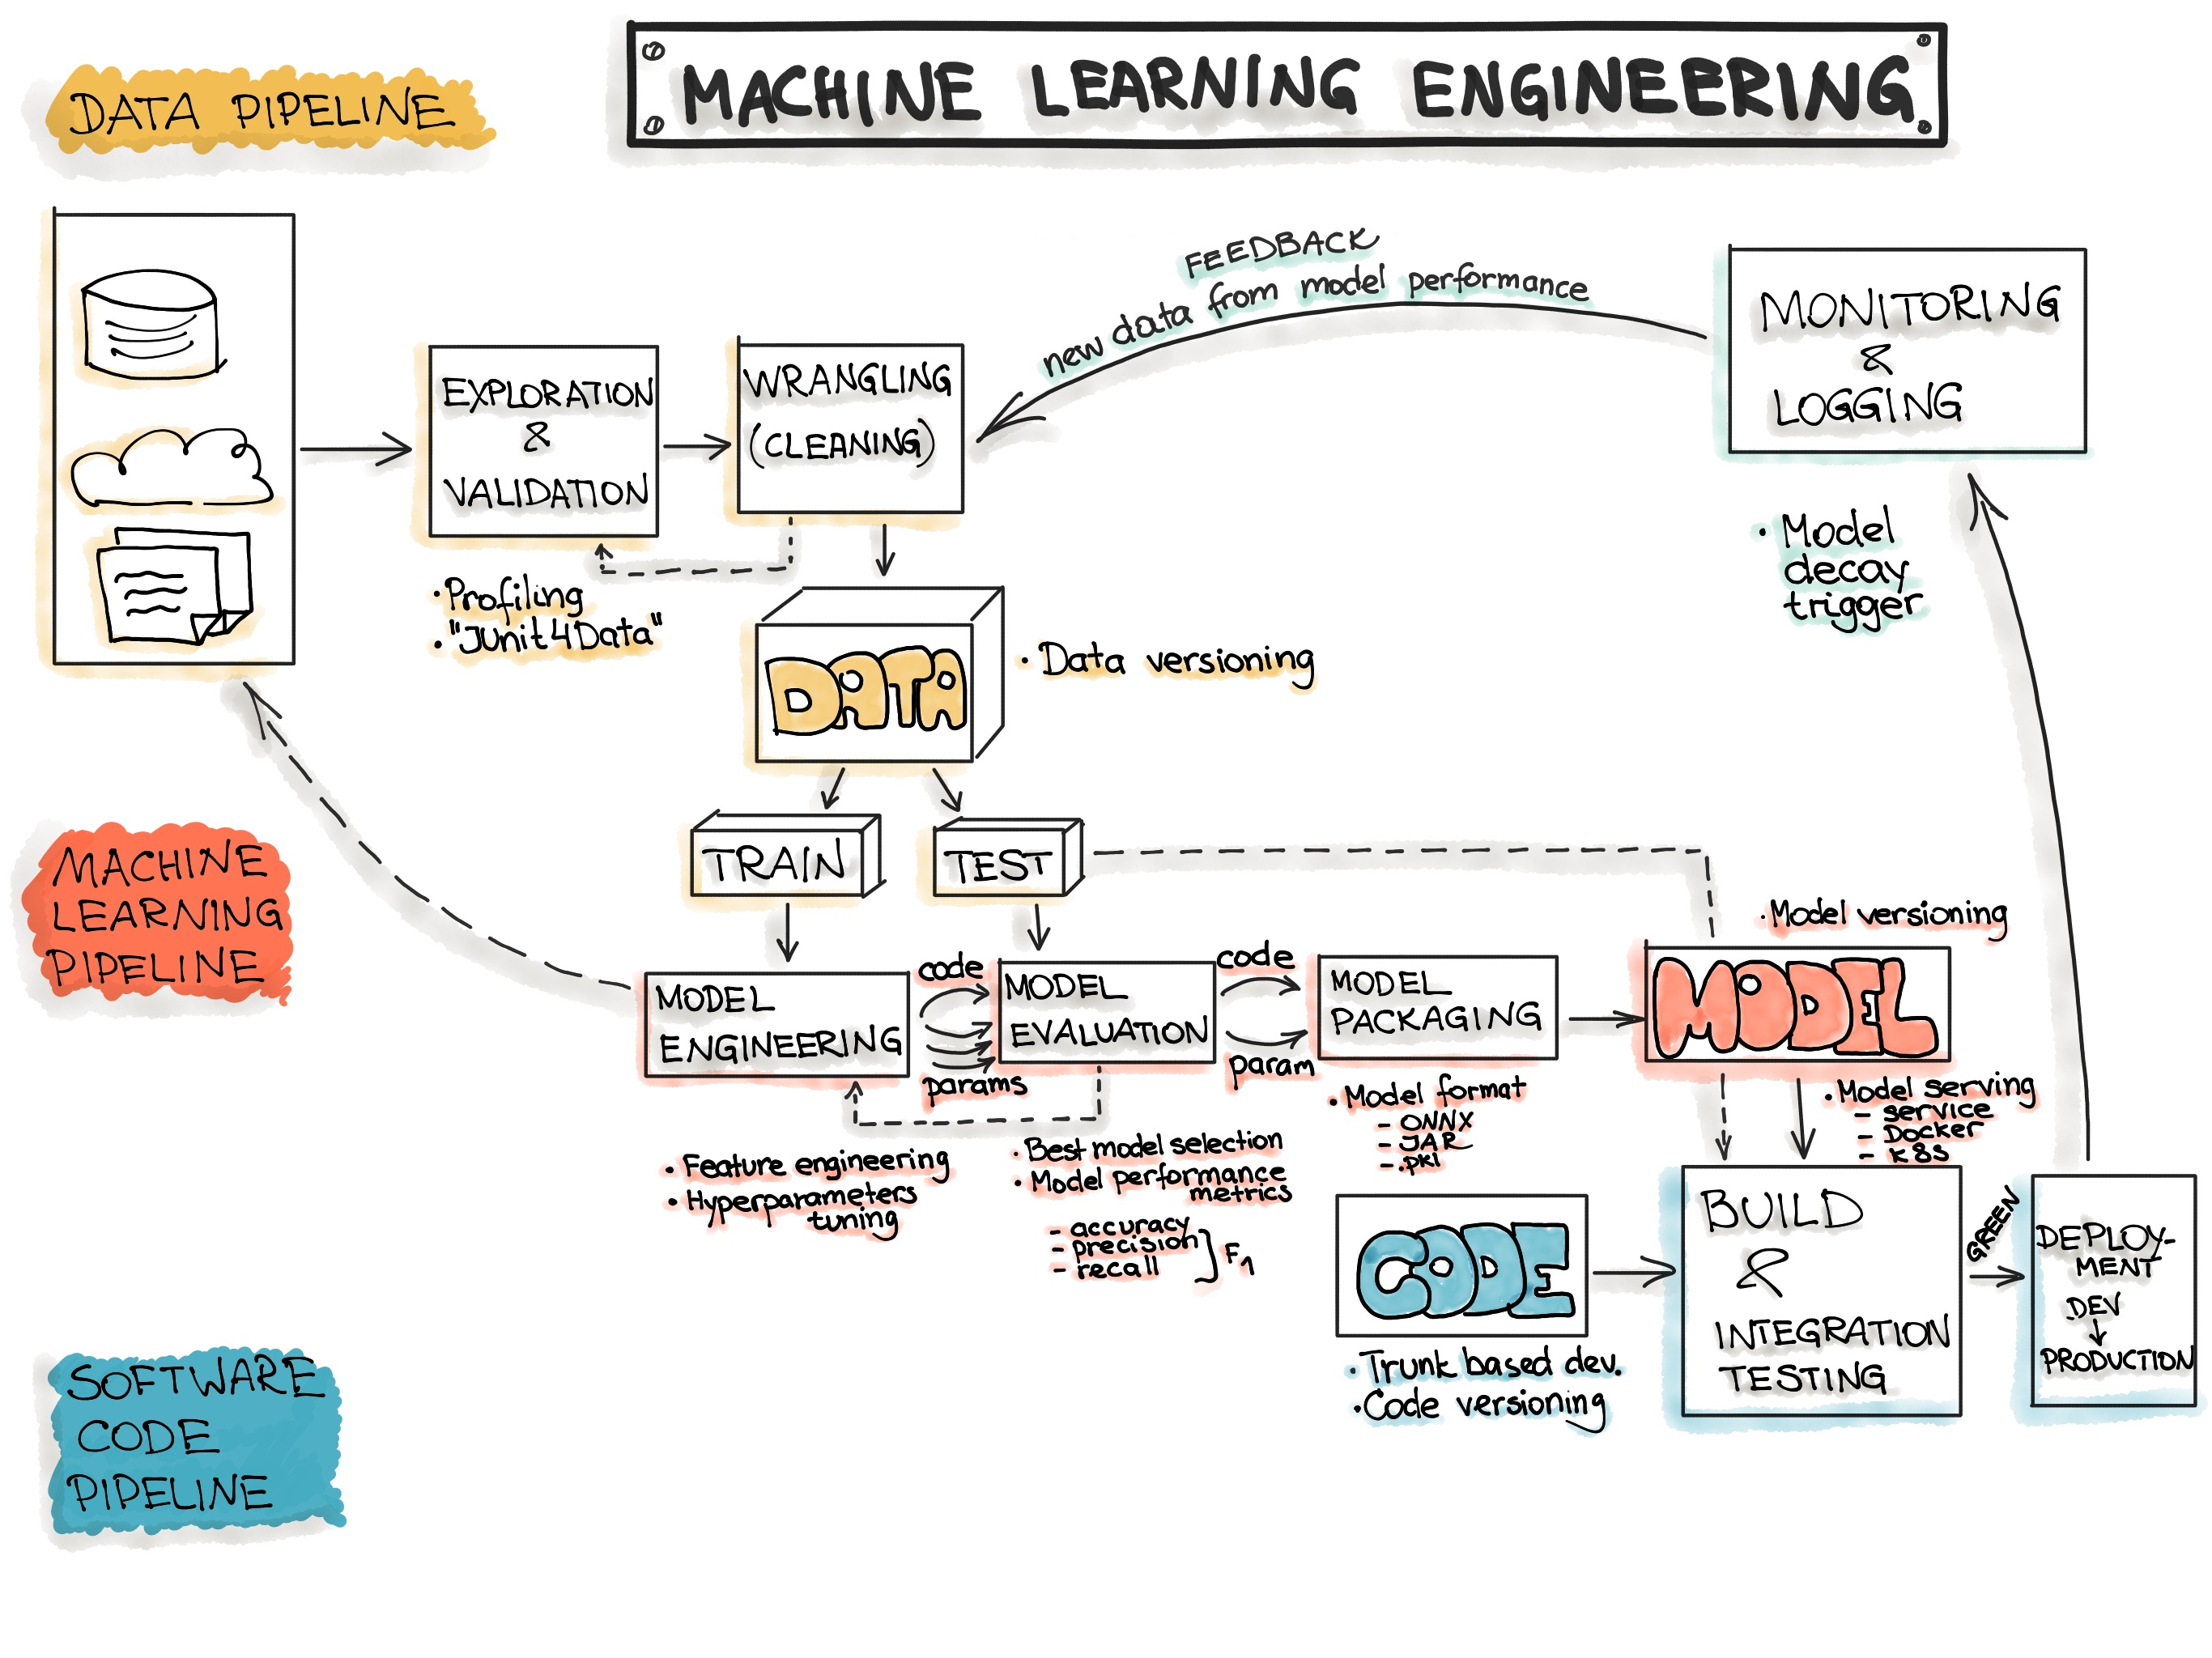

### Basic regression types

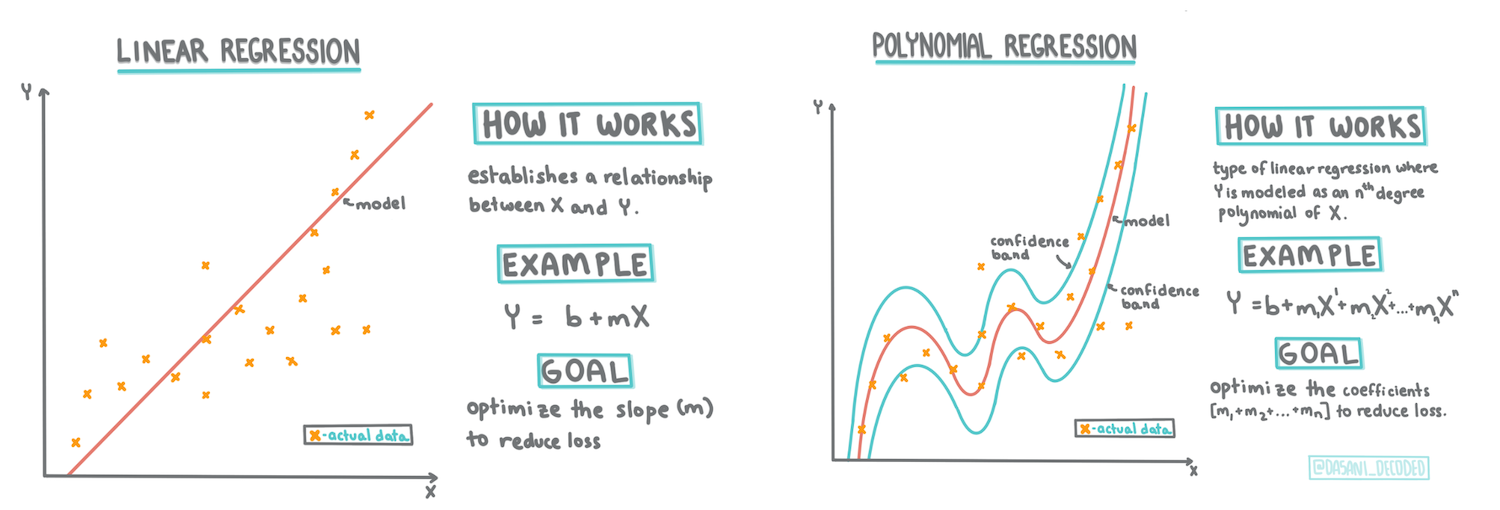

# Linear Regression
<hr style="border:2px solid black">

## 1. Introduction

### 1.1 What is Linear Regression?

- models a linear relationship between at least one explanatory variable $x$ (feature) and an outcome variable $y$ (target):
$\newline$
$$
y = w_0 + w_1x + \epsilon
$$
$\newline$
where
>- $w_0$ is the intercept or bias
>- $w_1$ is the coefficient or slope
>- $\epsilon$ is randomly distributed error term

- `model equation` is a linear function $\hat{y}(x)$ we fit to the data:    
$\newline$
$$
\hat y = w_0 + w_1 x 
$$
$\newline$
- more generally, when we have more than one features, we are fitting a hyperplane:
$\newline$
$$\hat y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
$$
$\newline$

- shorthand linear algebraic notation with a coefficient vector $w$:
$\newline$    
$$
\hat y = X \cdot w^T
$$
$\newline$

### 1.2 How are regression models evaluated?

- In Ordinary Least Squares (OLS) regression, one minimizes the `Mean Squared Error` loss function:
$\newline$
$$ 
MSE = \frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2
$$ 
$\newline$
- another variant is to minimize the `Mean Absolute Error`:
$\newline$
$$ 
MAE = \frac{1}{N}\sum_{i=1}^{N}|y_i-\hat{y}_i|
$$ 
$\newline$

### 1.3 How to find model parameters?

**`Normal Equation`**
>- can be solved to find the model parameters analytically:
>$\newline$
>$$ 
\hat{w}^T = \frac{X^Ty}{X^TX}
$$ 
>$\newline$
>- time complexity goes like $O(N³)$; becomes very slow for many data points 
>- runs into problem if the features are linearly dependent

**`Gradient Descent`**
>- a good alternative for finding optimal parameters
>- starts with a random guess and performs minimization steps until it reaches optimal values

### 1.4 Goodness of Fit

- coefficient of determination, $R²$, given by the formula:
$\newline$
$$ 
R²~=~1-\frac{RSS}{TSS}~=~1 - \frac{\sum_{i=1}^{N}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{N}(y_i-\bar{y})^2}
$$ 
$\newline$
- gives the fraction of variance in the target variable explained by performing the regression 
    + $R²=1.0$: $\quad$model has a perfect fit – no errors in predictions
    + $R²=0.0$: $\quad$model is no better than a simple average over all points (baseline model)
    + $R²<0.0$: $\quad$worse than a baseline model, possible only for multiple linear regression

<hr style="border:2px solid black">

## 2. Example: Penguin Dataset

**Load packages**

In [2]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# machine learning stack
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# miscellaneous
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

**Load data**

In [ ]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df.head()

**quick exploration**

In [ ]:
df.info()

In [ ]:
df.describe()

In [6]:
penguins = df

In [ ]:
# Plot histograms for each numerical variable
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


sns.histplot(penguins['bill_length_mm'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bill Length (mm)')

sns.histplot(penguins['bill_depth_mm'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Bill Depth (mm)')

sns.histplot(penguins['flipper_length_mm'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Flipper Length (mm)')

sns.histplot(penguins['body_mass_g'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Body Mass (g)')

plt.tight_layout()
plt.show()


In [ ]:
# Scatter plots to show relationships between variables
sns.pairplot(penguins, hue='sex', markers=["o", "s"])
plt.show()

In [9]:
# Select the feature and target variable
X = penguins[['bill_length_mm']]  # Feature (independent variable)
y = penguins['body_mass_g']  # Target (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:

# Create a linear regression model
model = LinearRegression()


In [ ]:

# Train the model
model.fit(X_train, y_train)


In [12]:

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
# Scatter plot of actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual Body Mass')
plt.scatter(X_test, y_pred, color='red', label='Predicted Body Mass')

# Line plot of the linear model (predicted values)
plt.plot(X_test, y_pred, color='green', label='Linear Model')

# Add labels and title
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Penguin Body Mass Prediction using Bill Length')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

**Features and target variables**

In [15]:
numerical_features = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm'
]

categorical_features = [
    'species',
    'island',
    'sex'
]

features = numerical_features + categorical_features

target_variable = 'body_mass_g'

In [16]:
# feature and target columns
X,y = df[features],df[target_variable]

**Train-test split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape, X_test.shape

### 2.1 Exploratory Data Analysis

In [ ]:
X_train

#### correlation among numerical features

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(
    data=X_train[numerical_features].corr(),
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
)

#### correlation among categorical features

In [20]:
def cramers_corrected_stat(df,cat_col1,cat_col2):
    """
    This function spits out corrected Cramer's correlation statistic
    between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df[cat_col1],df[cat_col2])
    chi_sqr = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

In [ ]:
cramer_v_corr = dict(
    zip(
        categorical_features,
        [[cramers_corrected_stat(X_train,f1,f2) for f2 in categorical_features] for f1 in categorical_features]
    )
)

plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cramer_v_corr,index=categorical_features),
            cmap='magma',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=-1,
            vmax=1
           );

**correlation between categorical and numerical features**

In [22]:
def anova_pvalue(df,cat_col,num_col):
    """
    This function spits out the anova p-value (probability of no correlation) 
    between a categorical column and a numerical column of a dataframe
    """
    CategoryGroupLists = df.groupby(cat_col)[num_col].apply(list)
    AnovaResults = ss.f_oneway(*CategoryGroupLists)
    p_value = round(AnovaResults[1],3)
    return p_value

In [ ]:
anova_pvalue_dict = dict(
    zip(
        numerical_features,
        [[anova_pvalue(X_train,f1,f2) for f2 in numerical_features] for f1 in categorical_features]
    )
)

plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=anova_pvalue_dict,index=categorical_features),
            cmap='viridis',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=0,
            vmax=1
           );

***Comment: p_value in all the cases < 0.05 implying likely correlation between categorical and numerical features***

### 2.2 Baseline Model

In [24]:
class BaselineModel:
    """
    Baseline model predicting only the mean value of the target variable
    """
    def predict(self,X):
        y_mean = y_train.mean()
        return [y_mean]*X.shape[0]

In [ ]:
from sklearn.metrics import r2_score

y_baseline_train_pred = BaselineModel().predict(X_train)
r2 = r2_score(y_train,y_baseline_train_pred)

print(f'baseline model train score: {round(r2,6)}')

In [ ]:
y_baseline_pred = BaselineModel().predict(X_test)
r2 = r2_score(y_test,y_baseline_pred)
r2

In [ ]:
print(f'baseline model test score: {round(r2,6)}')


### 2.3 Model Building

**Feature engineering**

In [28]:
# column transformation
transformer = ColumnTransformer([
    ('scaling', MinMaxScaler(), numerical_features),
    ('onehot', OneHotEncoder(drop='first'), categorical_features)
])

#### Model base pipeline

In [29]:
# pipeline
pipeline = Pipeline(
    [('col_transformer', transformer),                  # step-1 column transformation
     ('lr_model', LinearRegression(fit_intercept=True)) # step-2 linear fit
    ])

In [ ]:
# model training
pipeline.fit(X_train,y_train)

### 2.4 Model Evaluation

In [ ]:
# training score
training_score = pipeline.score(X_train,y_train)
print(f'training score: {round(training_score,6)}')

In [ ]:
# test score
test_score = pipeline.score(X_test,y_test)
print(f'test score: {round(test_score,6)}')

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
# Select the feature and target variable
X = penguins[['bill_length_mm']]  # Feature (independent variable)
y = penguins['body_mass_g']  # Target (dependent variable)


In [40]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:

# Create polynomial features (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [57]:

# Create a linear regression model
model = LinearRegression()


In [58]:

# Train the model on polynomial features
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Sort the values for better plotting
sorted_zip = sorted(zip(X_test['bill_length_mm'], y_test, y_pred))
X_test_sorted, y_test_sorted, y_pred_sorted = zip(*sorted_zip)


In [ ]:

# Plot the results
plt.figure(figsize=(10, 6))

# Scatter plot of actual values
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Body Mass')

# Line plot of the polynomial model (predicted values)
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Polynomial Model')

# Add labels and title
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Penguin Body Mass Prediction using Polynomial Regression')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

<hr style="border:2px solid black">